[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\ferna\AppData\Local\Temp\ipykernel_11416\596139905.py:48: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = new_df.pct_change()
C:\Users\ferna\AppData\Local\Temp\ipykernel_11416\596139905.py:56: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[*********************100%***********************]  1 of 1 completed
Sharpe do Portfólio: 0.04444873638196628
Volatilidade do Portfólio: 0.019270138414881535
 
Sharpe do Benchmark: 0.030240091845006638
Volatilidade do Benchmark: 0.011175442442707025


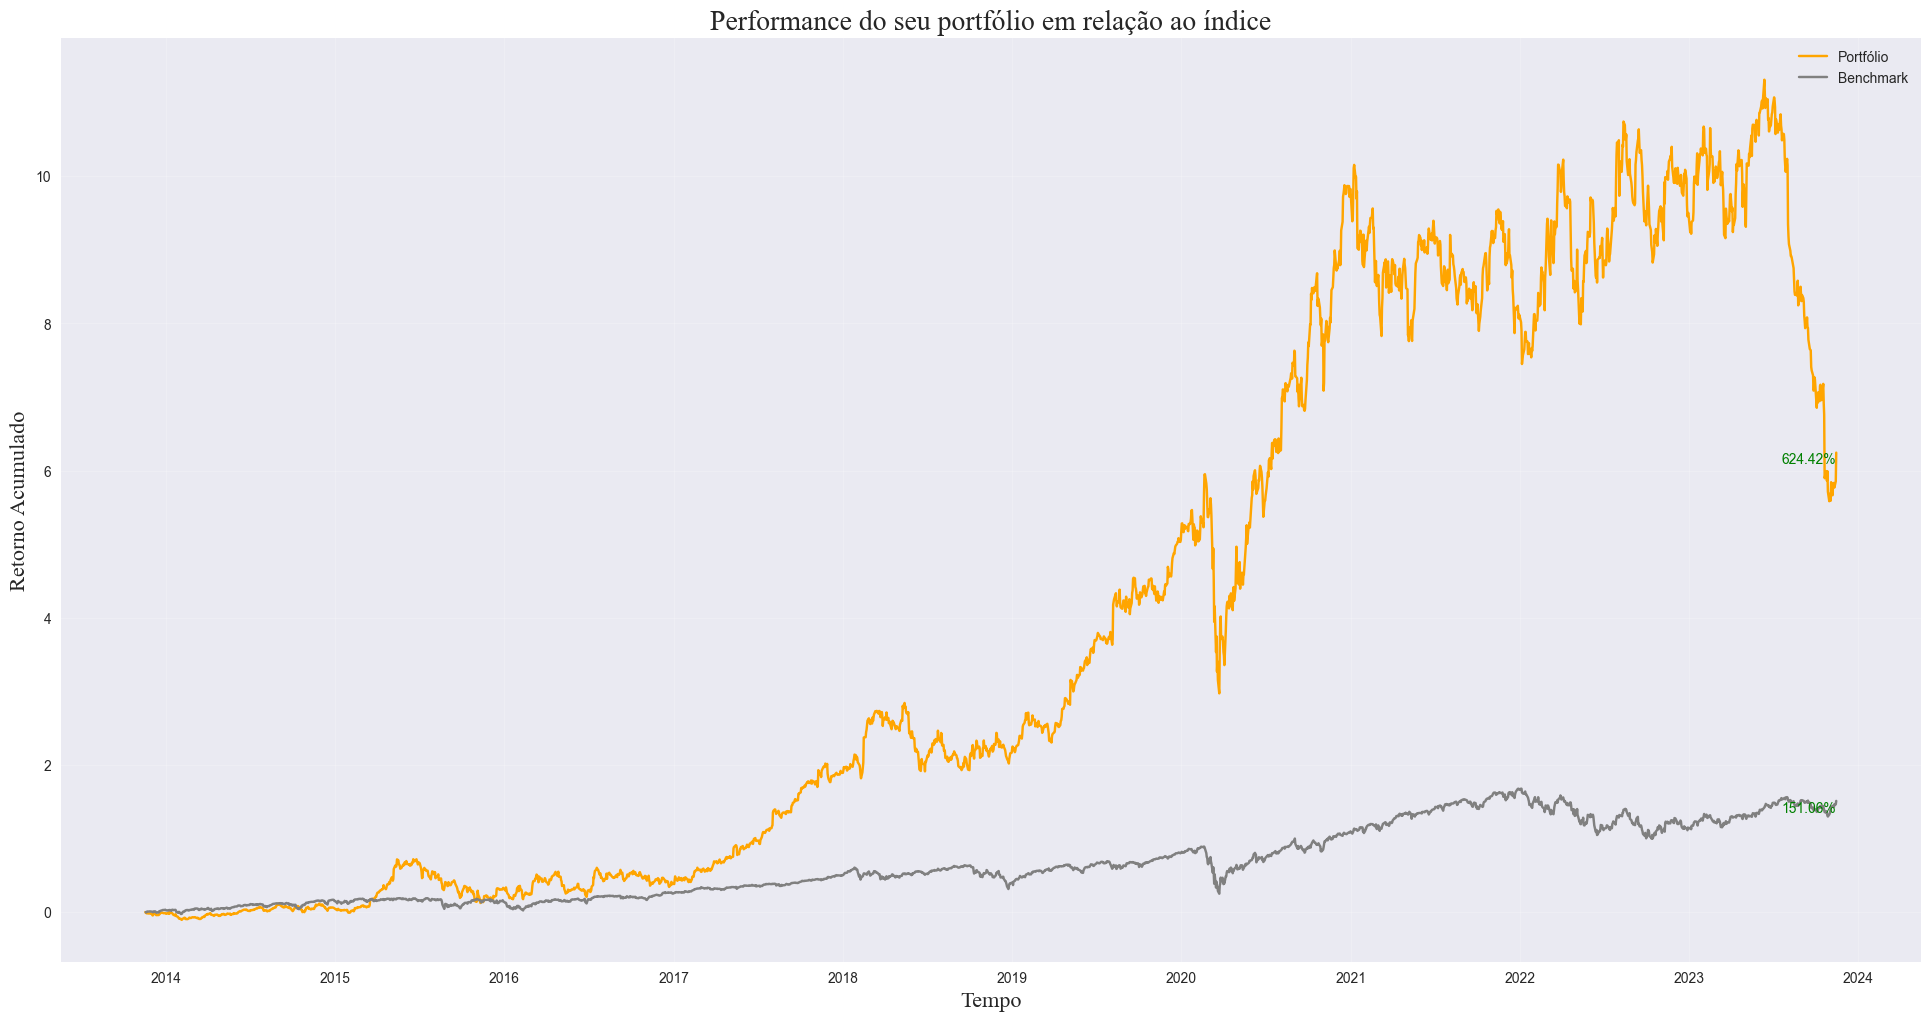

In [5]:
# Simulador de Perfomance de Portfólio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from datetime import timedelta

# Definindo o intervalo de tempo
end_date = datetime.today()
start_date = end_date - timedelta(days = 3650)

# Definindo os ativos do nosso portfólio
lista_assets = []
while True:
    assets = str(input("Faça aqui o backtest do seu portfólio de ações brasileiras! Para isso, diigte o ticker da ação (XXXXN.SA) e digite 'FIM' para finalizar a seleção das ações."))
    if assets.upper() == 'FIM':
        break
    lista_assets.append(assets)

# Definindo os pesos para cada ativo
weights = []
for asset in lista_assets:
    weight = float(input(f"Insira o peso para o ativo {asset}:"))
    weights.append(weight)
weights = [weight/sum(weights) for weight in weights]

# Obtendo dados do nosso benchmark
benchmark = str(input('Digite o código do benchmark: '))
data_benchmark = yf.download(benchmark, start= start_date, end= end_date)['Adj Close']
benchmark_daily_return = data_benchmark.pct_change().dropna()
benchmark_accum_return = (1 + benchmark_daily_return).cumprod() - 1
benchmark_avg_daily_return = np.mean(benchmark_daily_return)
benchmark_daily_std_dev = np.std(benchmark_daily_return)

# Obtendo os dados dos ativos do nosso portfólio e organizando-os
portfolio = []
for i in lista_assets:
    data = yf.download(i, start= start_date, end= end_date)['Adj Close']
    df_data = pd.DataFrame(data)
    df_data.rename(columns= {'Adj Close': i}, inplace= True)
    df_values = df_data[i]
    portfolio.append(df_values)
df_portfolio = pd.DataFrame(portfolio)
new_df = df_portfolio.transpose()

# Calculando os retornos diários e acumulados
returns = new_df.pct_change()
names_columns = [coluna for coluna in returns.columns]
returns_portfolio = returns[names_columns].mul(weights).sum(axis= 1)
returns['Portfolio'] = returns_portfolio
returns.drop(names_columns, axis= 1, inplace= True)
return_acum = (1 + returns).cumprod() - 1

# Plotando o gráfico da performance do portfólio em relação ao benchmark
plt.style.use('seaborn')
plt.figure(figsize= (24, 12))
plt.grid(True, alpha= 0.2)
plt.xlabel('Tempo', fontdict= {'family': 'Times New Roman', 'size': 16})
plt.ylabel('Retorno Acumulado', fontdict= {'family': 'Times New Roman', 'size': 16})
plt.title('Performance do seu portfólio em relação ao índice', fontdict= {'family': 'Times New Roman', 'size': 20})
plt.plot(return_acum['Portfolio'], color= 'orange', label= 'Portfólio')
plt.text(return_acum.index[-1], return_acum['Portfolio'].iloc[-1],
         f"{return_acum['Portfolio'].iloc[-1]:.2%}", color = 'green', fontsize= 10,
         verticalalignment= 'top', horizontalalignment= 'right')
plt.plot(benchmark_accum_return, color= 'gray', label= 'Benchmark')
plt.text(benchmark_accum_return.index[-1], benchmark_accum_return.iloc[-1],
         f"{benchmark_accum_return.iloc[-1]:.2%}", color = 'green', fontsize= 10,
         verticalalignment= 'top', horizontalalignment= 'right')
plt.legend()
#plt.savefig('Carteira Estratégia 2')

# Coletando as informações da nossa risk free
risk_free = yf.download('^TNX', start= start_date, end= end_date)['Adj Close']
risk_free_rate = np.mean(risk_free)
risk_free_rate = (risk_free_rate/100)/252

# Calculando o índice Sharpe do nosso portfólio
portfolio_avg_daily_return = np.mean(returns['Portfolio'])
portfolio_daily_std_dev = np.std(returns['Portfolio'])
sharpe_portfolio = (portfolio_avg_daily_return - risk_free_rate)/portfolio_daily_std_dev
sharpe_benchmark = (benchmark_avg_daily_return - risk_free_rate)/benchmark_daily_std_dev
print(f'Sharpe do Portfólio: {sharpe_portfolio}')
print(f'Volatilidade do Portfólio: {portfolio_daily_std_dev}')
print(' ')
print(f'Sharpe do Benchmark: {sharpe_benchmark}')
print(f'Volatilidade do Benchmark: {benchmark_daily_std_dev}')